In [ ]:
import pyodbc
import pandas as pd

try:
    conn = pyodbc.connect(
    r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=server_name;'
    r'DATABASE=database_name;'
    r'Trusted_Connection=yes;'
    )


    query = "SELECT * FROM vw_ml_features"
    df = pd.read_sql(query, conn)

    print("Data Loaded Successfully.")
    print(df.head(10))

except Exception as e:
    print(f"Error: {e}")
    
finally:
    if 'conn' in locals():
        conn.close()

C:\Users\aakas\AppData\Local\Temp\ipykernel_15804\487862091.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Data Loaded Successfully.
   customerID  gender  SeniorCitizen  partner  Dependents  tenure  \
0  0002-ORFBO       0          False     True        True       9   
1  0003-MKNFE       1          False    False       False       9   
2  0004-TLHLJ       1          False    False       False       4   
3  0011-IGKFF       1           True     True       False      13   
4  0013-EXCHZ       0           True     True       False       3   
5  0013-MHZWF       0          False    False        True       9   
6  0013-SMEOE       0           True     True       False      71   
7  0014-BMAQU       1          False     True       False      63   
8  0015-UOCOJ       0           True    False       False       7   
9  0016-QLJIS       0          False     True        True      65   

   contract_monthly  contract_one_year  contract_two_year  MonthlyCharges  \
0                 0                  1                  0       65.599998   
1                 1                  0                  0   

Overview of columns
- gender: Whether the customer is Male (1) or Female (0)
- SeniorCitizen: indicates if the cudtomer is a senior (1) or not (0)
- 

In [3]:
clean_df = df.copy()

In [4]:
print(f"Total Number of Record: {clean_df.shape[0]}")
print(f"Total Number of Columns: {clean_df.shape[1]}")

Total Number of Record: 7043
Total Number of Columns: 25


In [5]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerID            7043 non-null   object 
 1   gender                7043 non-null   int64  
 2   SeniorCitizen         7043 non-null   bool   
 3   partner               7043 non-null   bool   
 4   Dependents            7043 non-null   bool   
 5   tenure                7043 non-null   int64  
 6   contract_monthly      7043 non-null   int64  
 7   contract_one_year     7043 non-null   int64  
 8   contract_two_year     7043 non-null   int64  
 9   MonthlyCharges        7043 non-null   float64
 10  TotalCharges          7043 non-null   float64
 11  PhoneService          7043 non-null   bool   
 12  Multiplelines         7043 non-null   bool   
 13  internet_DSL          7043 non-null   int64  
 14  internet_fiber_optic  7043 non-null   int64  
 15  internet_No          

In [6]:
# Check if columns with only one unique value.
for col in clean_df.columns:
    if len(clean_df[col].unique()) == 1:
        print(col,clean_df[col].unique())

In [7]:
# Drop the Column "CustomerID" it does not provide any usefull info.

clean_df = clean_df.drop(['customerID'], axis=1)
clean_df

,gender,SeniorCitizen,partner,Dependents,tenure,contract_monthly,contract_one_year,contract_two_year,MonthlyCharges,TotalCharges,...,internet_No,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Churn
0,0,False,True,True,9,0,1,0,65.599998,593.299988,...,0,False,True,False,True,True,False,True,Mailed check,False
1,1,False,False,False,9,1,0,0,59.900002,542.400024,...,0,False,False,False,False,False,True,False,Mailed check,False
2,1,False,False,False,4,1,0,0,73.900002,280.850006,...,0,False,False,True,False,False,False,True,Electronic check,True
3,1,True,True,False,13,1,0,0,98.000000,1237.849976,...,0,False,True,True,False,True,True,True,Electronic check,True
4,0,True,True,False,3,1,0,0,83.900002,267.399994,...,0,False,False,False,True,True,False,True,Mailed check,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,False,False,False,13,0,1,0,55.150002,742.900024,...,0,True,False,False,True,False,False,False,Mailed check,False
7039,1,False,True,False,22,1,0,0,85.099998,1873.699951,...,0,False,False,False,False,False,True,True,Electronic check,True
7040,1,False,False,False,2,1,0,0,50.299999,92.750000,...,0,False,True,False,False,False,False,True,Mailed check,False
7041,1,False,True,True,67,0,0,1,67.849998,4627.649902,...,0,True,False,True,True,False,True,False,Mailed check,False


In [ ]:
# change the datatype of boolean columns to int64.
for col in clean_df.columns:
    if clean_df[col].dtype == bool:
        clean_df[col] = clean_df[col].astype('Int64')

In [9]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                7043 non-null   int64  
 1   SeniorCitizen         7043 non-null   Int64  
 2   partner               7043 non-null   Int64  
 3   Dependents            7043 non-null   Int64  
 4   tenure                7043 non-null   int64  
 5   contract_monthly      7043 non-null   int64  
 6   contract_one_year     7043 non-null   int64  
 7   contract_two_year     7043 non-null   int64  
 8   MonthlyCharges        7043 non-null   float64
 9   TotalCharges          7043 non-null   float64
 10  PhoneService          7043 non-null   Int64  
 11  Multiplelines         7043 non-null   Int64  
 12  internet_DSL          7043 non-null   int64  
 13  internet_fiber_optic  7043 non-null   int64  
 14  internet_No           7043 non-null   int64  
 15  OnlineSecurity       

In [10]:
clean_df.isnull().sum()

gender                  0
SeniorCitizen           0
partner                 0
Dependents              0
tenure                  0
contract_monthly        0
contract_one_year       0
contract_two_year       0
MonthlyCharges          0
TotalCharges            0
PhoneService            0
Multiplelines           0
internet_DSL            0
internet_fiber_optic    0
internet_No             0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Churn                   0
dtype: int64

In [11]:
# how many unique categories each object-type columns has
clean_df.select_dtypes(include = 'object').nunique()

PaymentMethod    4
dtype: int64

In [12]:
clean_df['PaymentMethod'].describe(include='object')

count                 7043
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object

In [13]:
numeric_col = ['tenure','MonthlyCharges','TotalCharges']
clean_df[numeric_col].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794471
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.549988
50%,29.000000,70.349998,1394.550049
75%,55.000000,89.849998,3786.599976
max,72.000000,118.750000,8684.799805


In [14]:
(clean_df['tenure']==0).sum()

np.int64(11)

C:\Users\aakas\AppData\Local\Temp\ipykernel_15804\344861869.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=clean_df, x='Churn', ax=axes[0], palette=['Blue','Red'])
C:\Users\aakas\AppData\Local\Temp\ipykernel_15804\344861869.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Not Churn','Churn'])
C:\Users\aakas\AppData\Local\Temp\ipykernel_15804\344861869.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Female','Male'])


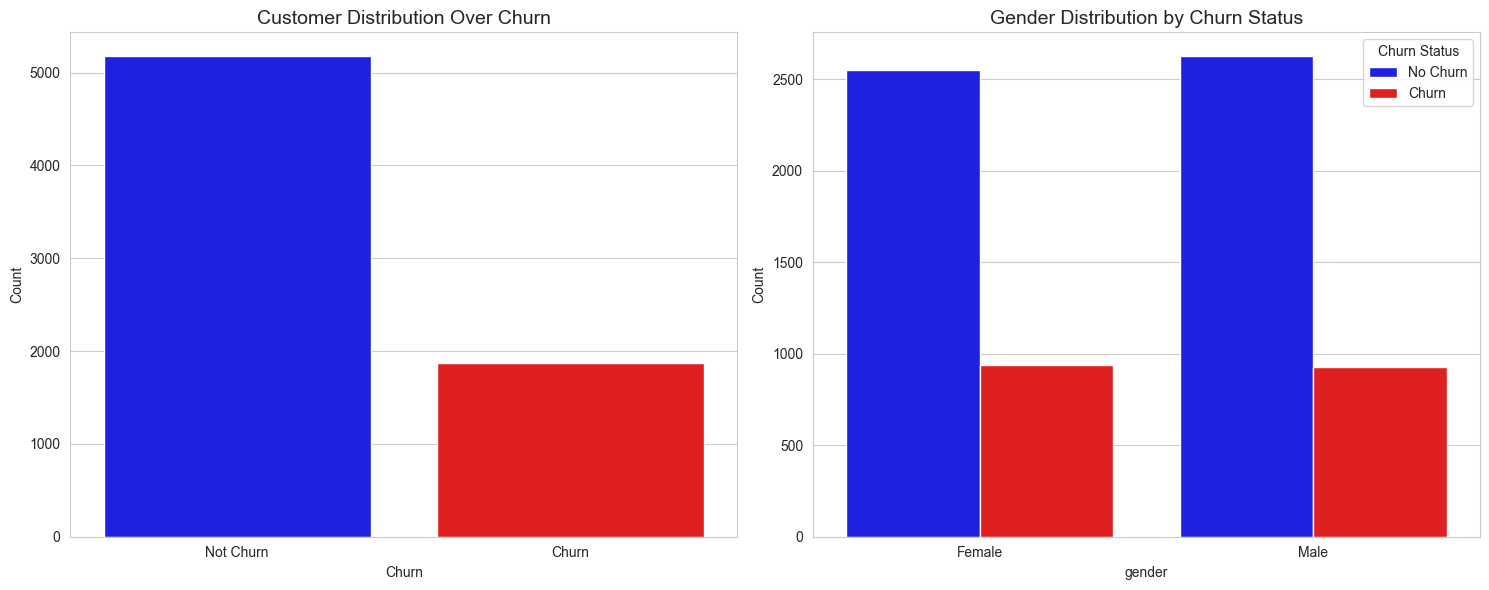

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize = (15,6))

sns.countplot(data=clean_df, x='Churn', ax=axes[0], palette=['Blue','Red'])
axes[0].set_title('Customer Distribution Over Churn', fontsize=14)
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Not Churn','Churn'])

sns.countplot(data=clean_df, x='gender', hue='Churn', ax=axes[1], palette=['Blue','Red'])
axes[1].set_title('Gender Distribution by Churn Status', fontsize=14)
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(['Female','Male'])
axes[1].legend(['No Churn','Churn'], title='Churn Status')

plt.tight_layout()
plt.show()

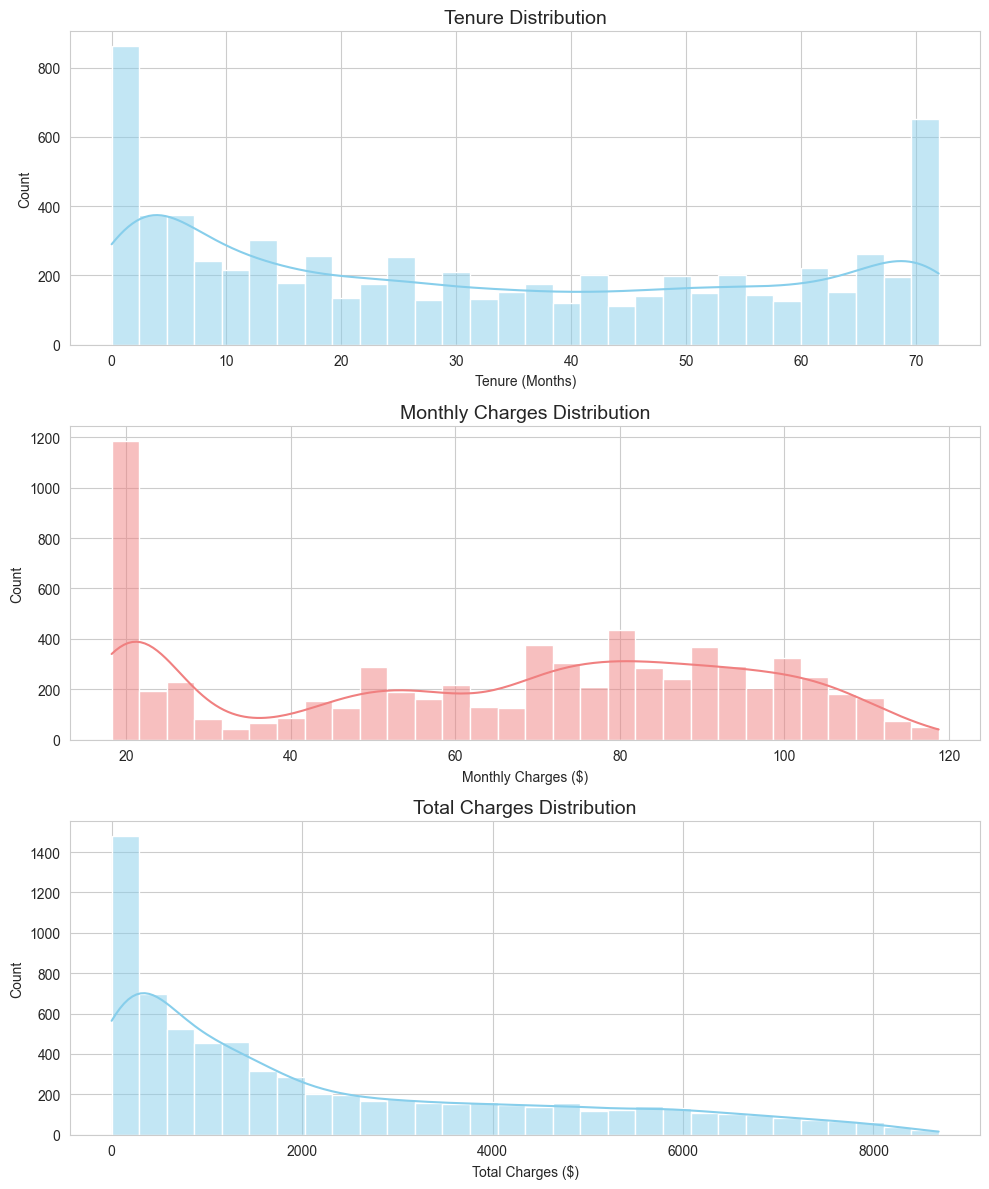

In [16]:
# Create vertical Sub-plots
sns.set_style('whitegrid')
fig, axes = plt.subplots(3, 1, figsize = (10,12))

# Histogram for Tenure.
sns.histplot(data=clean_df, bins=30, x='tenure', ax=axes[0], color = 'skyblue', kde=True )
axes[0].set_title('Tenure Distribution', fontsize=14)
axes[0].set_xlabel('Tenure (Months)')

# Histogram for Monthly Charges.
sns.histplot(data=clean_df['MonthlyCharges'], bins=30, ax=axes[1], color='lightcoral', kde=True )
axes[1].set_title('Monthly Charges Distribution', fontsize=14)
axes[1].set_xlabel('Monthly Charges ($)')

# Histogram for Total Charges.
sns.histplot(data=clean_df['TotalCharges'], bins=30, ax=axes[2], color='skyblue', kde=True)
axes[2].set_title('Total Charges Distribution', fontsize=14)
axes[2].set_xlabel('Total Charges ($)')

plt.tight_layout()
plt.show()



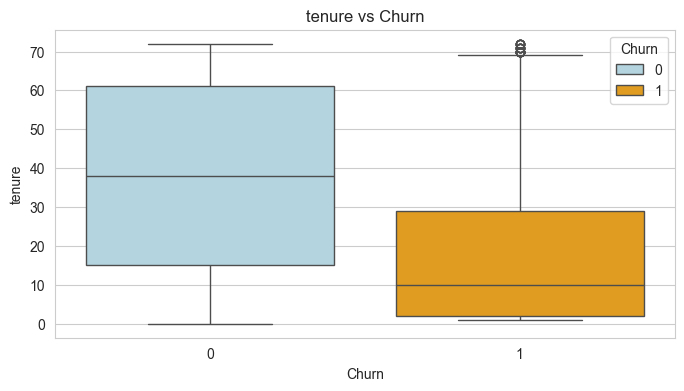

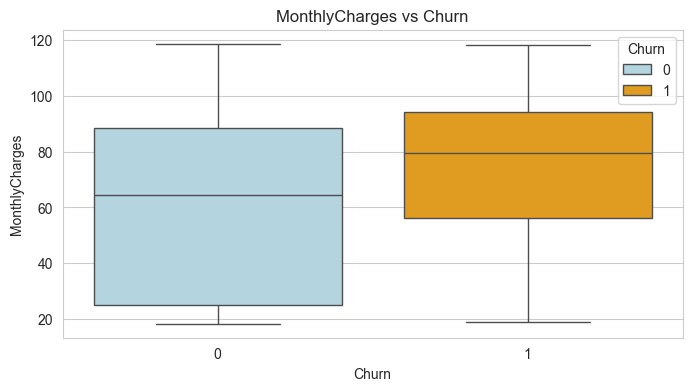

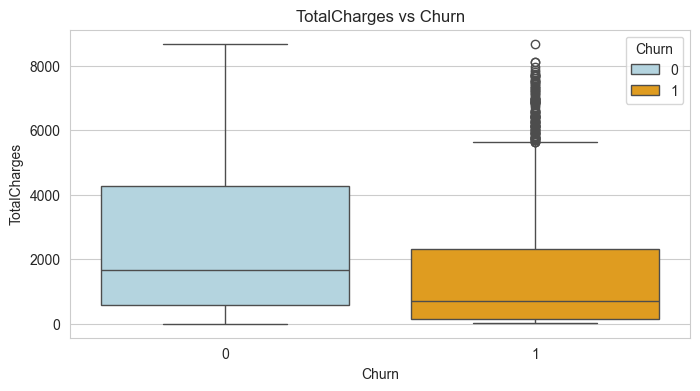

In [17]:
num_col = ['tenure','MonthlyCharges','TotalCharges']
sns.set_style('whitegrid')

for col in num_col:
    plt.figure(figsize=(8,4))
    sns.boxplot(hue='Churn', x='Churn', y=col, data=clean_df, palette=['lightblue','orange'])
    plt.title(f"{col} vs Churn")
    plt.show()


<Figure size 1200x600 with 0 Axes>

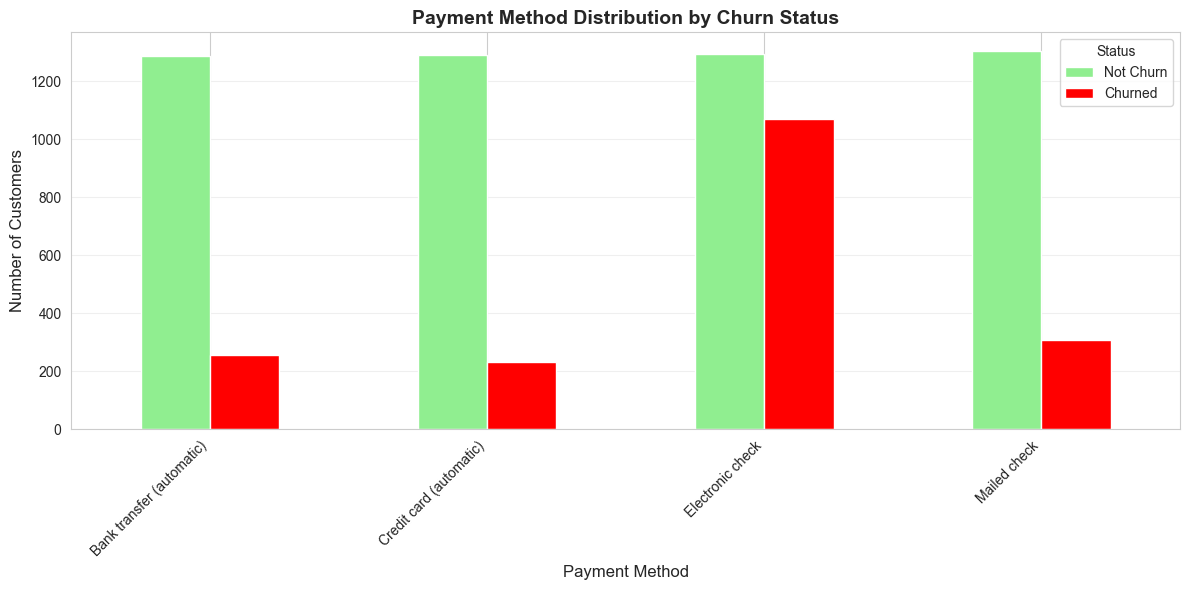

In [18]:
plt.figure(figsize=(12, 6))

# Create crosstab for the data
crosstab_data = pd.crosstab(clean_df['PaymentMethod'], clean_df['Churn'])

# Plot grouped bar chart
ax = crosstab_data.plot(kind='bar', 
                       color=['lightgreen', 'red'],
                       figsize=(12, 6))

plt.title('Payment Method Distribution by Churn Status', fontsize=14, fontweight='bold')
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(['Not Churn', 'Churned'], title='Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

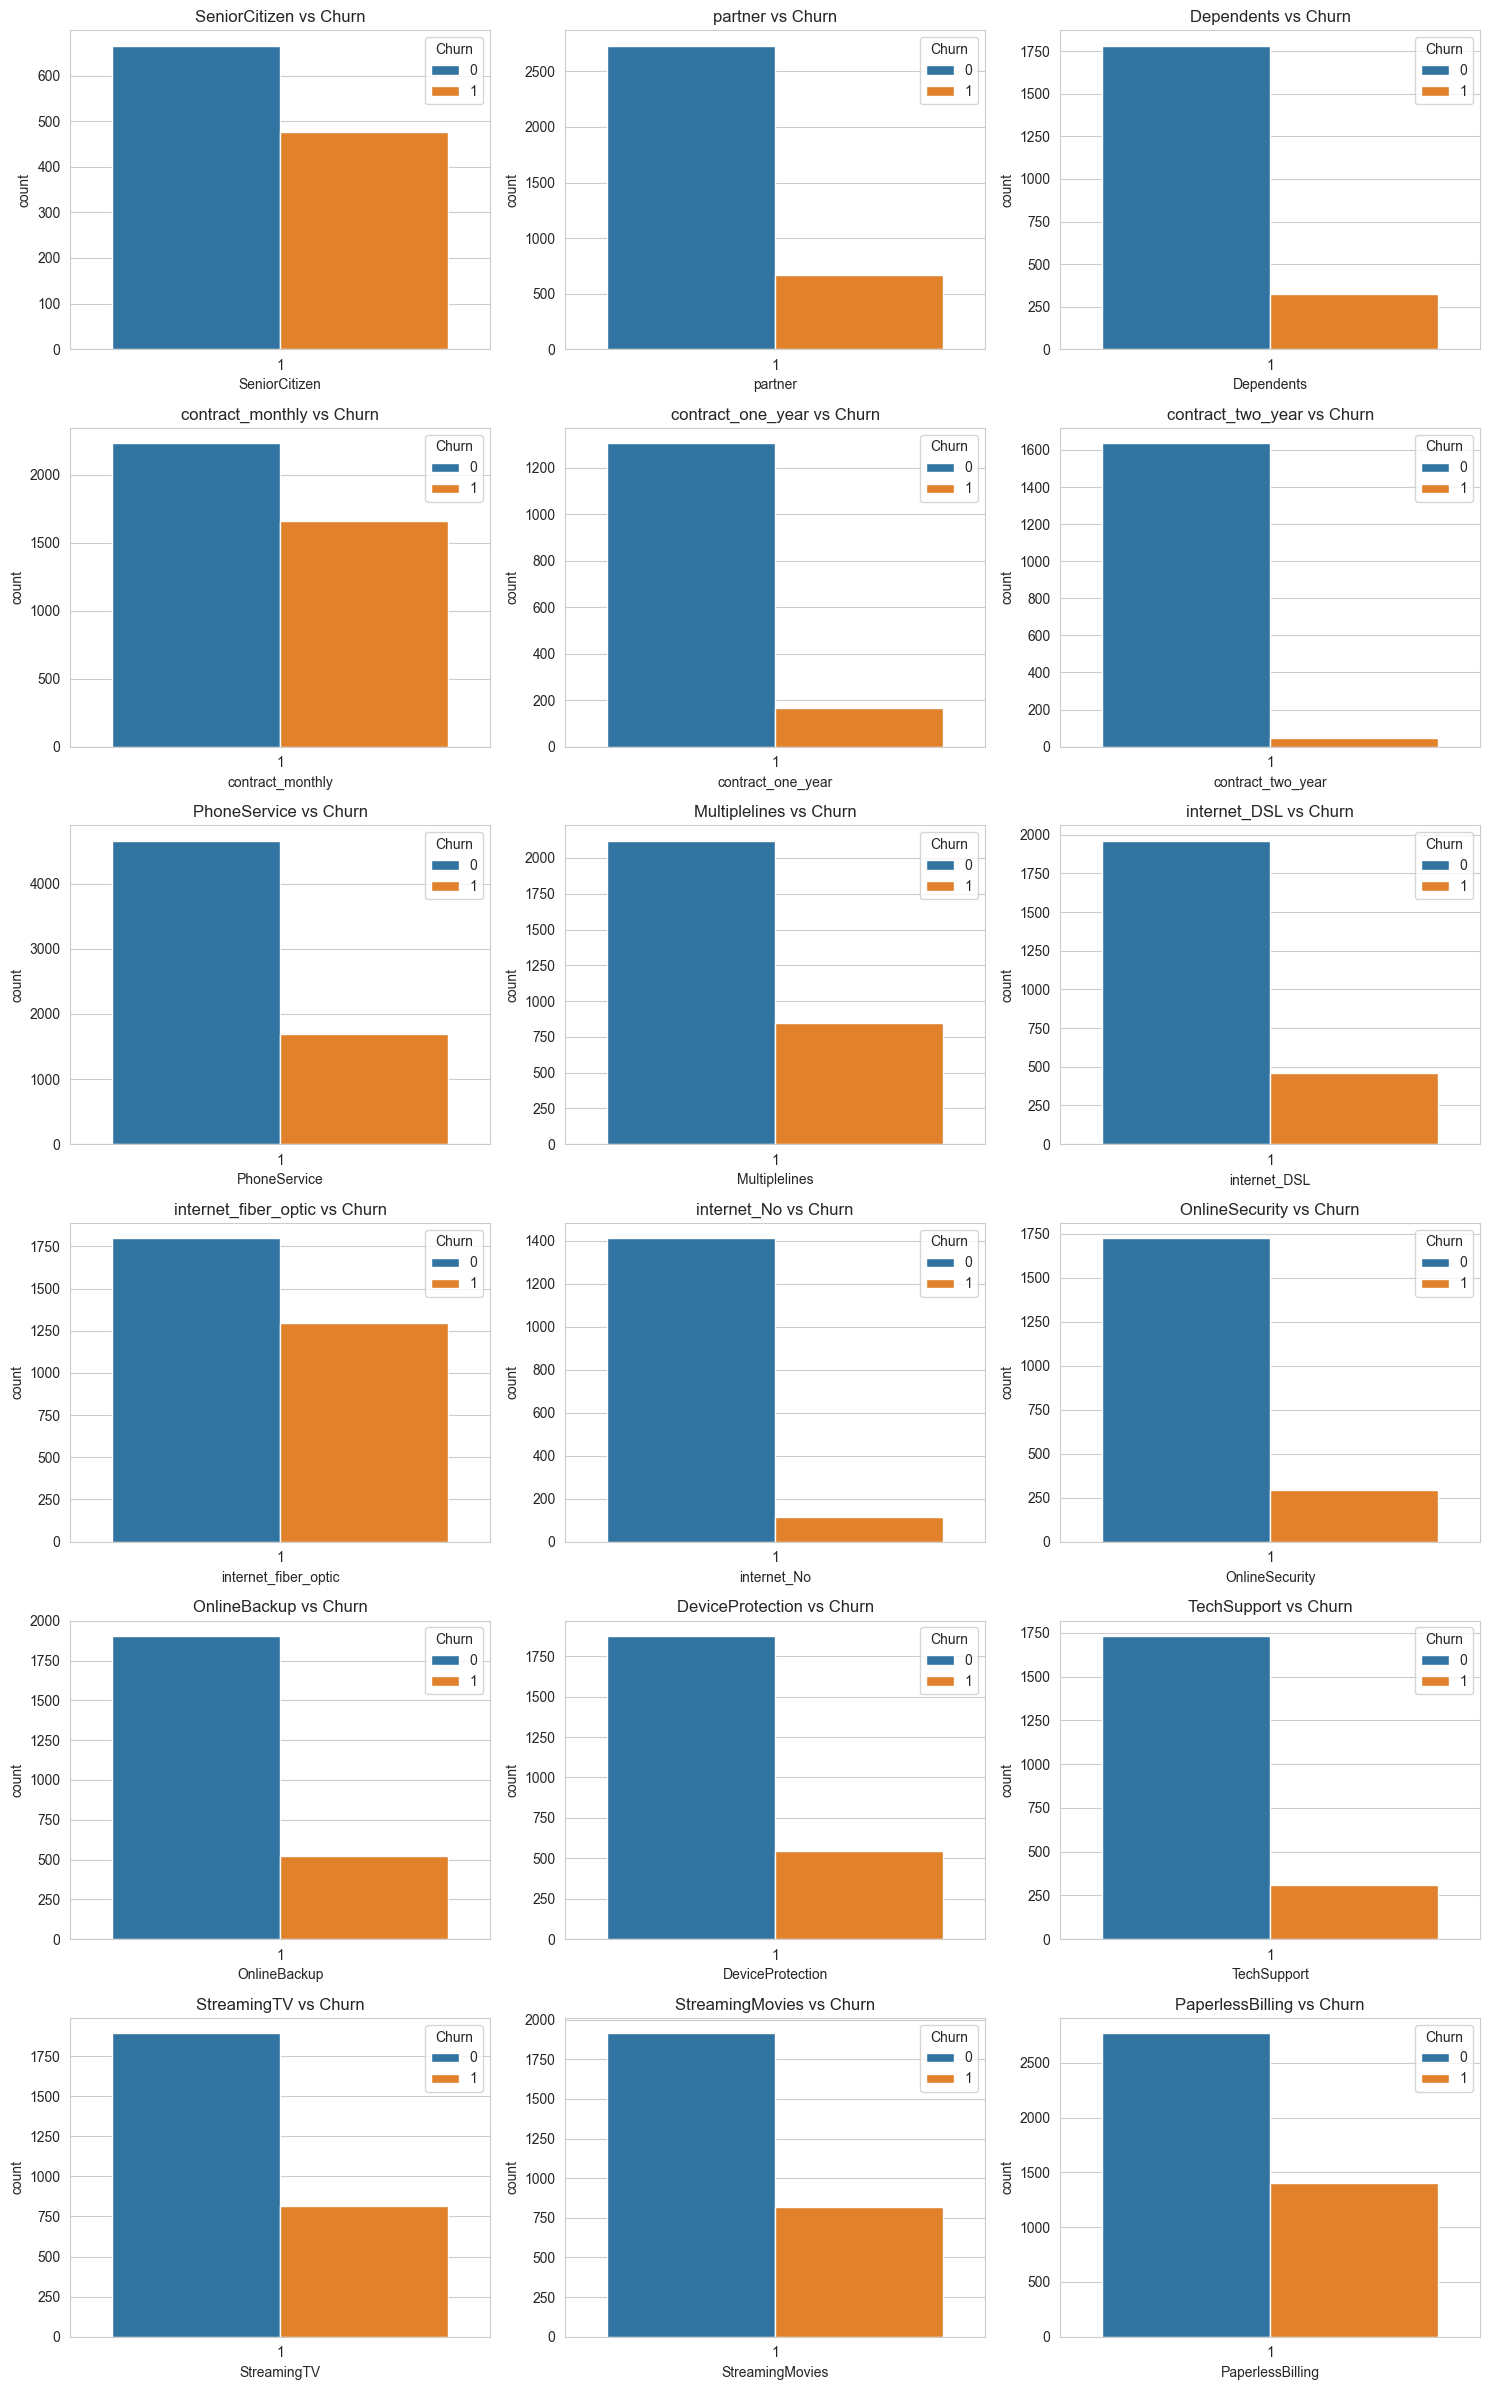

In [19]:
import math
cat_cols = [col for col in clean_df.columns if clean_df[col].nunique() <= 10 and col != 'Churn' and col != 'PaymentMethod' and col != 'gender']

n_cols = 3
n_rows = math.ceil(len(cat_cols)/n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=clean_df[clean_df[col]==1], hue='Churn', x=col, ax=axes[i])
    axes[i].set_title(f"{col} vs Churn")

for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

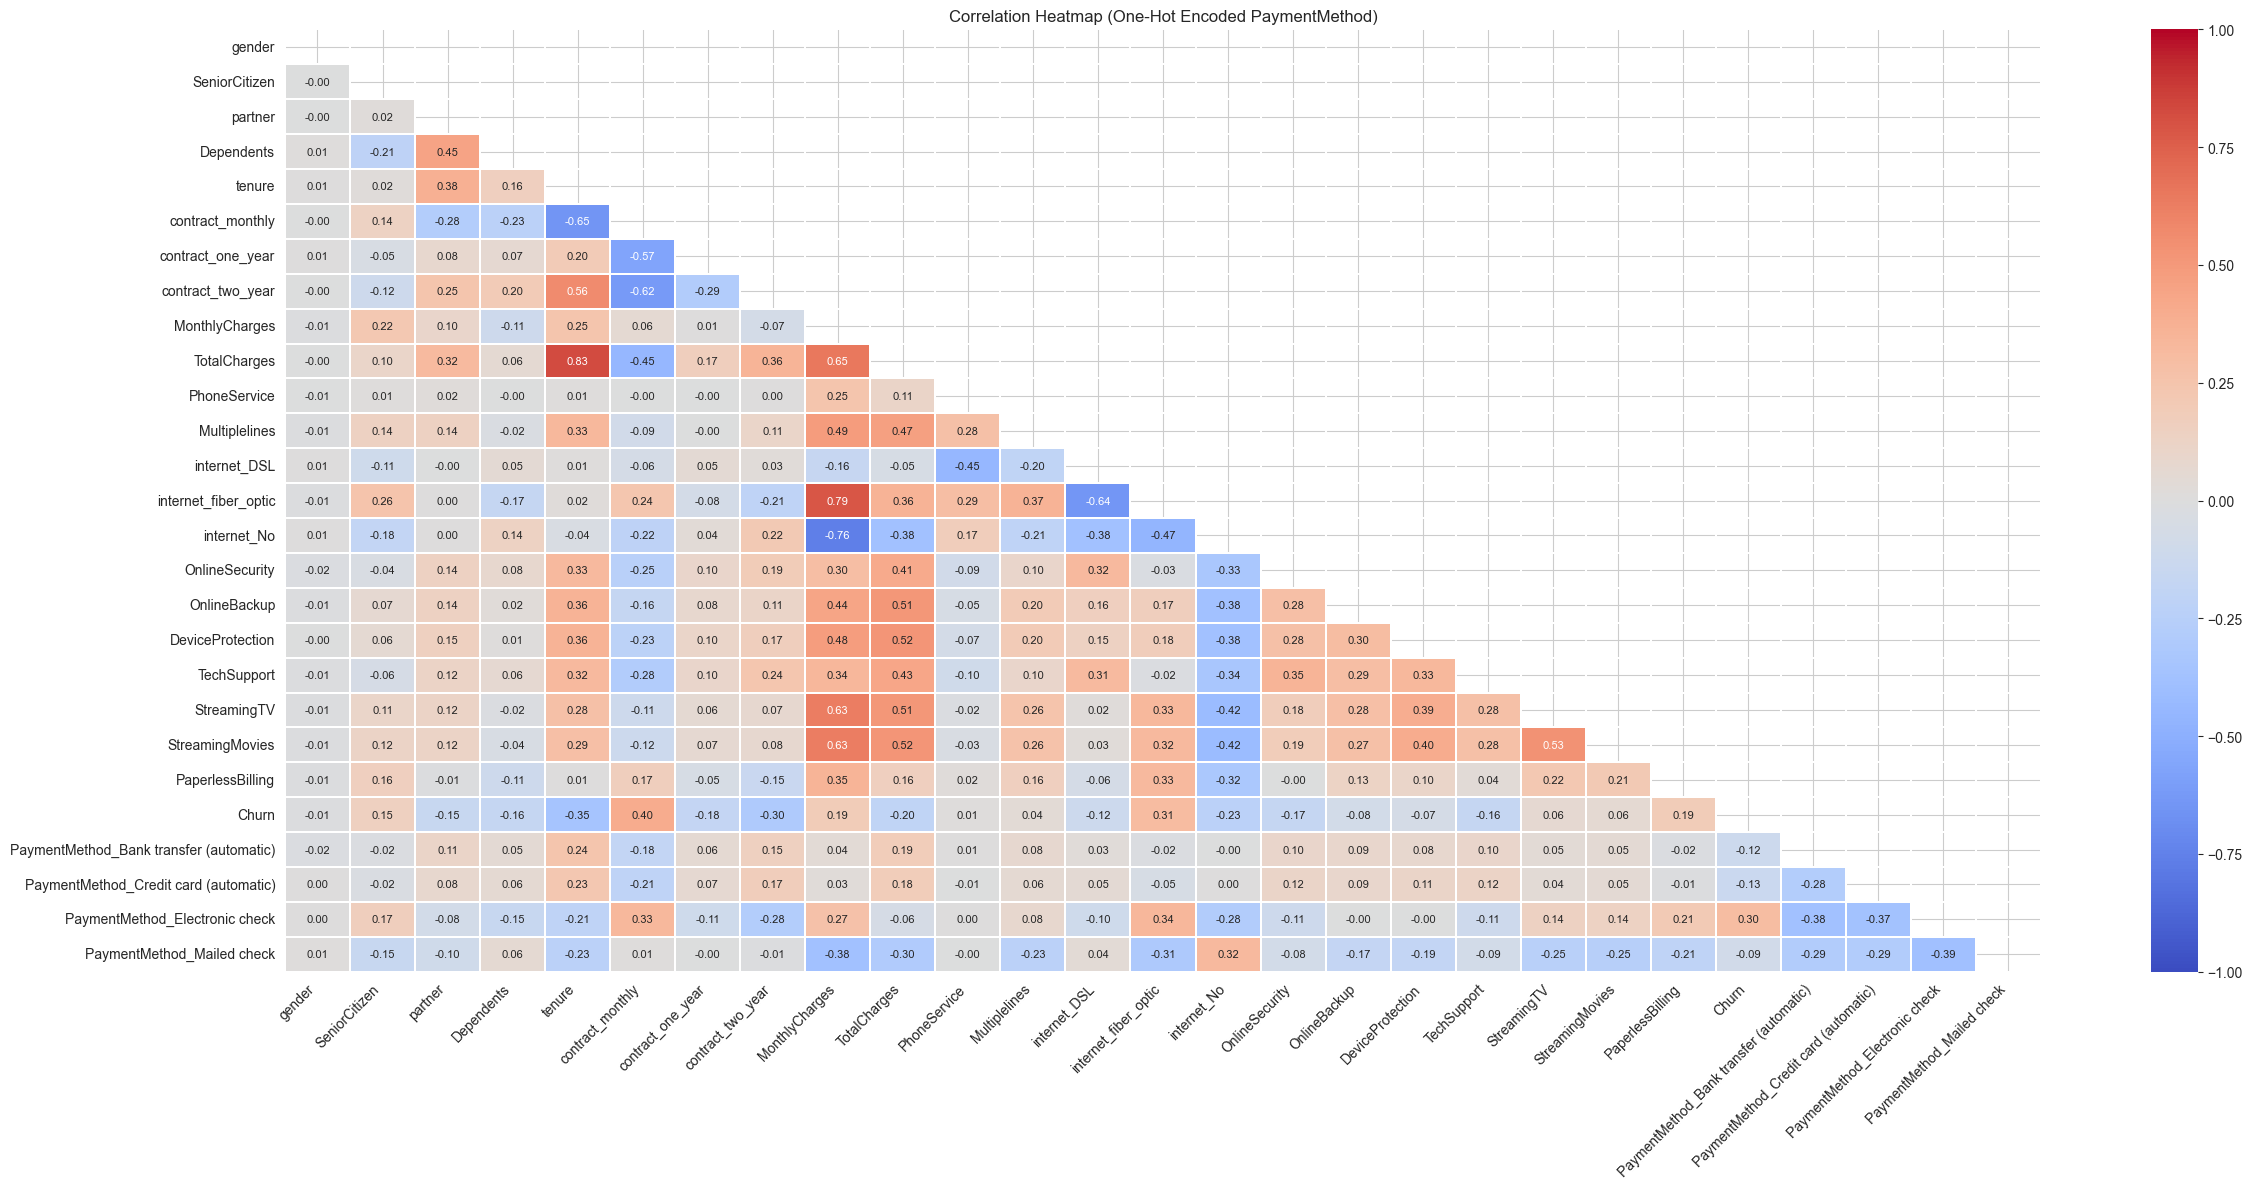

Churn                                      1.000000
contract_monthly                           0.403346
internet_fiber_optic                       0.308020
PaymentMethod_Electronic check             0.301919
MonthlyCharges                             0.193356
PaperlessBilling                           0.191825
SeniorCitizen                              0.150889
StreamingTV                                0.063228
StreamingMovies                            0.061382
Multiplelines                              0.040102
PhoneService                               0.011942
gender                                    -0.008612
DeviceProtection                          -0.066160
OnlineBackup                              -0.082255
PaymentMethod_Mailed check                -0.091683
PaymentMethod_Bank transfer (automatic)   -0.117937
internet_DSL                              -0.124214
PaymentMethod_Credit card (automatic)     -0.134302
partner                                   -0.150448
Dependents  

In [22]:
import numpy as np
df_encoded = clean_df.copy()
# One-hot encode PaymentMethod
payment_dummies = pd.get_dummies(df['PaymentMethod'], prefix='PaymentMethod')
df_encoded = pd.concat([df_encoded.drop('PaymentMethod', axis=1), payment_dummies], axis=1)

# Now calculate correlation with mixed data types
# Convert remaining categorical columns to numerical
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = pd.factorize(df_encoded[col])[0]

# Create correlation matrix
plt.figure(figsize=(25, 12))
corr = df_encoded.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, 
                 annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1, 
                 fmt='.2f', annot_kws={'size': 8})
plt.title('Correlation Heatmap (One-Hot Encoded PaymentMethod)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

corr_churn = corr['Churn'].sort_values(ascending=False)
print(corr_churn)

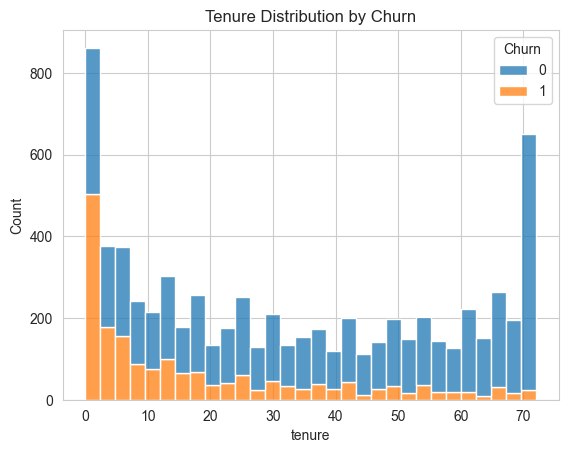

In [23]:
sns.histplot(data=clean_df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Tenure Distribution by Churn')
plt.show()

In [35]:
payment_dummies = pd.get_dummies(clean_df['PaymentMethod'], prefix='PaymentMethod')
clean_df = pd.concat([clean_df.drop('PaymentMethod', axis=1), payment_dummies], axis=1)

for col in clean_df.columns:
    if clean_df[col].dtype == bool:
        clean_df[col] = clean_df[col].astype('Int64')

clean_df.head()




,gender,SeniorCitizen,partner,Dependents,tenure,contract_monthly,contract_one_year,contract_two_year,MonthlyCharges,TotalCharges,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,0,1,0,65.599998,593.299988,...,0,1,1,0,1,0,0,0,0,1
1,1,0,0,0,9,1,0,0,59.900002,542.400024,...,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,4,1,0,0,73.900002,280.850006,...,1,0,0,0,1,1,0,0,1,0
3,1,1,1,0,13,1,0,0,98.000000,1237.849976,...,1,0,1,1,1,1,0,0,1,0
4,0,1,1,0,3,1,0,0,83.900002,267.399994,...,0,1,1,0,1,1,0,0,0,1


In [ ]:
df_demo = clean_df.copy()
df_demo['total_charges_log'] = np.log1p(df_demo['TotalCharges'])
df_demo['is_new_customer'] = (df_demo['tenure']<= 6).astype(int)
df_demo['is_at_risk_period'] = ((df_demo['tenure'] > 6) & (df_demo['tenure'] <= 24)).astype(int)
df_demo['is_stable'] = ((df_demo['tenure'] > 24) & (df_demo['tenure'] < 48)).astype(int)
df_demo['is_loyal'] = (df_demo['tenure'] >= 48).astype(int)
df_demo['plan_tier'] = pd.cut(df_demo['MonthlyCharges'], 
                              bins=[0,30,50,80,float('inf')],
                              labels=['Basic','Standard','Premium','Ultimate'])

df_demo.head(20)

,gender,SeniorCitizen,partner,Dependents,tenure,contract_monthly,contract_one_year,contract_two_year,MonthlyCharges,TotalCharges,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,total_charges_log,is_new_customer,is_at_risk_period,is_stable,is_loyal,plan_tier
0,0,0,1,1,9,0,1,0,65.599998,593.299988,...,0,0,0,1,6.387384,0,1,0,0,Premium
1,1,0,0,0,9,1,0,0,59.900002,542.400024,...,0,0,0,1,6.297846,0,1,0,0,Premium
2,1,0,0,0,4,1,0,0,73.900002,280.850006,...,0,0,1,0,5.641375,1,0,0,0,Premium
3,1,1,1,0,13,1,0,0,98.000000,1237.849976,...,0,0,1,0,7.121939,0,1,0,0,Ultimate
4,0,1,1,0,3,1,0,0,83.900002,267.399994,...,0,0,0,1,5.592478,1,0,0,0,Ultimate
5,0,0,0,1,9,1,0,0,69.400002,571.450012,...,0,1,0,0,6.349925,0,1,0,0,Premium
6,0,1,1,0,71,0,0,1,109.699997,7904.250000,...,1,0,0,0,8.975282,0,0,0,1,Ultimate
7,1,0,1,0,63,0,0,1,84.650002,5377.799805,...,0,1,0,0,8.590221,0,0,0,1,Ultimate
8,0,1,0,0,7,1,0,0,48.200001,340.350006,...,0,0,1,0,5.832908,0,1,0,0,Standard
9,0,0,1,1,65,0,0,1,90.449997,5957.899902,...,0,0,0,1,8.692641,0,0,0,1,Ultimate


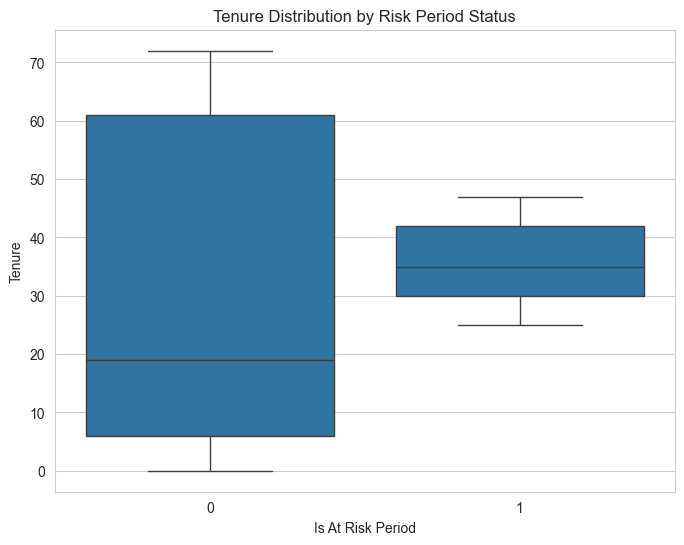

In [58]:
# If you only want to analyze 'is_at_risk_period'
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.boxplot(data=df_demo, x='is_stable', y='tenure', ax=ax)
ax.set_title('Tenure Distribution by Risk Period Status')
ax.set_xlabel('Is At Risk Period')
ax.set_ylabel('Tenure')

plt.show()

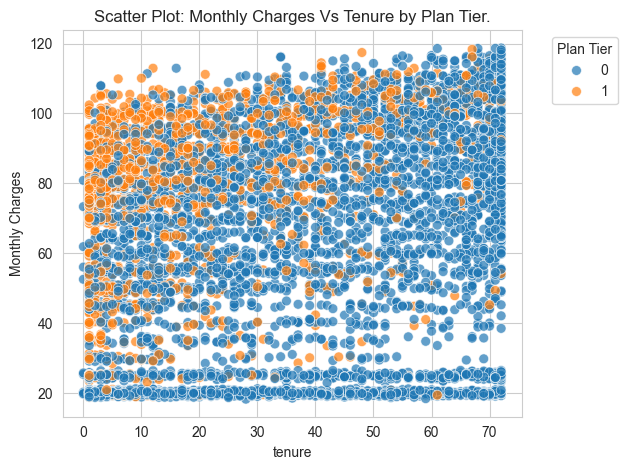

In [65]:
plt.Figure(figsize=(25,10))
sns.scatterplot(data=df_demo, 
                x='tenure',
                y='MonthlyCharges',
                hue='Churn',
                alpha = 0.7,
                s = 50)

plt.title('Scatter Plot: Monthly Charges Vs Tenure by Plan Tier.')
plt.xlabel('tenure')
plt.ylabel('Monthly Charges')
plt.legend(title='Plan Tier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Unique Plan Tiers:
plan_tier
Ultimate    2666
Premium     2078
Basic       1653
Standard     646
Name: count, dtype: int64


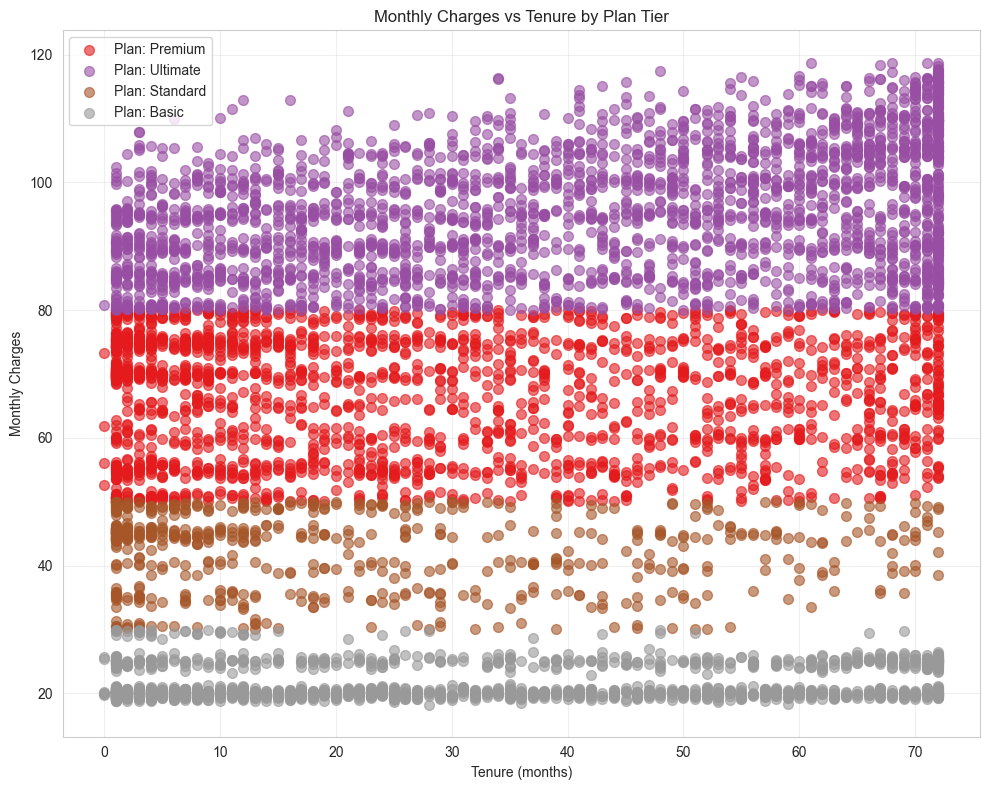

In [61]:
# Check unique values in plan_tier first
print("Unique Plan Tiers:")
print(df_demo['plan_tier'].value_counts())

# Method 1: Using matplotlib with color mapping
fig, ax = plt.subplots(figsize=(10, 8))

# Get unique plan tiers and assign colors
unique_tiers = df_demo['plan_tier'].unique()
colors = plt.cm.Set1(np.linspace(0, 1, len(unique_tiers)))

for i, tier in enumerate(unique_tiers):
    tier_data = df_demo[df_demo['plan_tier'] == tier]
    ax.scatter(tier_data['tenure'], tier_data['MonthlyCharges'], 
              c=[colors[i]], label=f'Plan: {tier}', alpha=0.6, s=50)

ax.set_xlabel('Tenure (months)')
ax.set_ylabel('Monthly Charges')
ax.set_title('Monthly Charges vs Tenure by Plan Tier')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [76]:
payment_dummies = pd.get_dummies(df_demo['plan_tier'], prefix='plan_tier')
df_demo = pd.concat([df_demo.drop('plan_tier', axis=1), payment_dummies], axis=1)

for col in df_demo.columns:
    if df_demo[col].dtype == bool:
        df_demo[col] = df_demo[col].astype('Int64')

df_demo.head()




,gender,SeniorCitizen,partner,Dependents,tenure,contract_monthly,contract_one_year,contract_two_year,MonthlyCharges,TotalCharges,...,PaymentMethod_Mailed check,total_charges_log,is_new_customer,is_at_risk_period,is_stable,is_loyal,plan_tier_Basic,plan_tier_Standard,plan_tier_Premium,plan_tier_Ultimate
0,0,0,1,1,9,0,1,0,65.599998,593.299988,...,1,6.387384,0,1,0,0,0,0,1,0
1,1,0,0,0,9,1,0,0,59.900002,542.400024,...,1,6.297846,0,1,0,0,0,0,1,0
2,1,0,0,0,4,1,0,0,73.900002,280.850006,...,0,5.641375,1,0,0,0,0,0,1,0
3,1,1,1,0,13,1,0,0,98.000000,1237.849976,...,0,7.121939,0,1,0,0,0,0,0,1
4,0,1,1,0,3,1,0,0,83.900002,267.399994,...,1,5.592478,1,0,0,0,0,0,0,1


In [90]:
df_demo.isnull().sum()

gender                                     0
SeniorCitizen                              0
partner                                    0
Dependents                                 0
tenure                                     0
contract_monthly                           0
contract_one_year                          0
contract_two_year                          0
MonthlyCharges                             0
TotalCharges                               0
PhoneService                               0
Multiplelines                              0
internet_DSL                               0
internet_fiber_optic                       0
internet_No                                0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
Churn     

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [79]:
# Selecting feature and target variable
X = df_demo.drop('Churn',axis=1)
y = df_demo['Churn']

In [80]:
# Train Test Split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [81]:
print("Distribution of train data.")
print(y_train.value_counts())

Distribution of train data.
Churn
0    4139
1    1495
Name: count, dtype: Int64


In [91]:
# QUICK FIX: Convert pandas nullable dtypes to numpy dtypes
print("Fixing problematic data types...")

# Convert problematic dtypes
dtype_fixes = {
    'Int64': 'int64',
    'Int32': 'int32', 
    'Int16': 'int16',
    'Float64': 'float64',
    'Float32': 'float32',
    'boolean': 'bool'
}

for col in X_train.columns:
    current_dtype = str(X_train[col].dtype)
    if current_dtype in dtype_fixes:
        # Handle nulls first
        if X_train[col].isnull().any():
            if 'int' in dtype_fixes[current_dtype] or dtype_fixes[current_dtype] == 'bool':
                fill_value = 0
            else:
                fill_value = X_train[col].median()
            
            X_train[col] = X_train[col].fillna(fill_value)
            X_test[col] = X_test[col].fillna(fill_value)
        
        # Convert dtype
        X_train[col] = X_train[col].astype(dtype_fixes[current_dtype])
        X_test[col] = X_test[col].astype(dtype_fixes[current_dtype])
        print(f"Fixed {col}: {current_dtype} → {dtype_fixes[current_dtype]}")

# NOW your SMOTE will work
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("✅ SMOTE applied successfully!")

Fixing problematic data types...
Fixed SeniorCitizen: Int64 → int64
Fixed partner: Int64 → int64
Fixed Dependents: Int64 → int64
Fixed PhoneService: Int64 → int64
Fixed Multiplelines: Int64 → int64
Fixed OnlineSecurity: Int64 → int64
Fixed OnlineBackup: Int64 → int64
Fixed DeviceProtection: Int64 → int64
Fixed TechSupport: Int64 → int64
Fixed StreamingTV: Int64 → int64
Fixed StreamingMovies: Int64 → int64
Fixed PaperlessBilling: Int64 → int64
Fixed PaymentMethod_Bank transfer (automatic): Int64 → int64
Fixed PaymentMethod_Credit card (automatic): Int64 → int64
Fixed PaymentMethod_Electronic check: Int64 → int64
Fixed PaymentMethod_Mailed check: Int64 → int64
Fixed plan_tier_Basic: Int64 → int64
Fixed plan_tier_Standard: Int64 → int64
Fixed plan_tier_Premium: Int64 → int64
Fixed plan_tier_Ultimate: Int64 → int64
✅ SMOTE applied successfully!


In [95]:
print(y_train_res.value_counts())

Churn
0    4139
1    4139
Name: count, dtype: Int64


In [96]:
# create train random forest
# random forest
rf_model_baseline = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model_baseline.fit(X_train_res, y_train_res)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [97]:
# create and train XGBoost
xgb_model_baseline = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss',verbosity=0)
xgb_model_baseline.fit(X_train_res, y_train_res)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [98]:
# create and train lightGBM
lgbm_model_baseline = LGBMClassifier(random_state=42, verbose=-1)
lgbm_model_baseline.fit(X_train_res, y_train_res)

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [103]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"Model Evaluation: {name}\n")
    
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}\n")

    # classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Metrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Metrix - {name}")
    plt.xlabel("prediction")
    plt.ylabel("Real Value")
    plt.show()

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f' ROC curve - {name}')
    plt.legend(loc="lower right")
    plt.show()
    
    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.figure(figsize=(5, 4))
    plt.plot(recall, precision, color='green')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall curve - {name}')
    plt.grid()
    plt.show


Model Evaluation: Random Forest

Accuracy: 0.7779

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      1035
         1.0       0.59      0.55      0.57       374

    accuracy                           0.78      1409
   macro avg       0.71      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



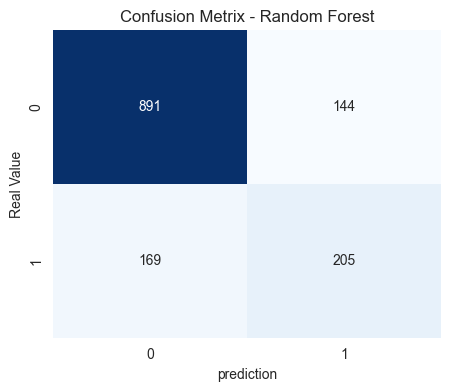

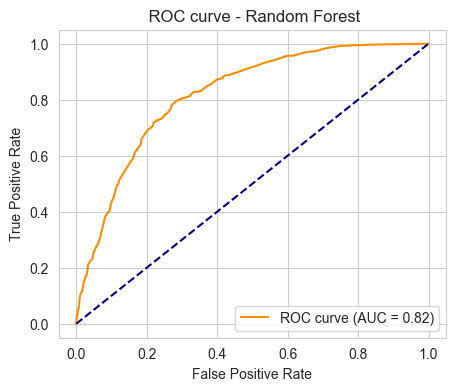

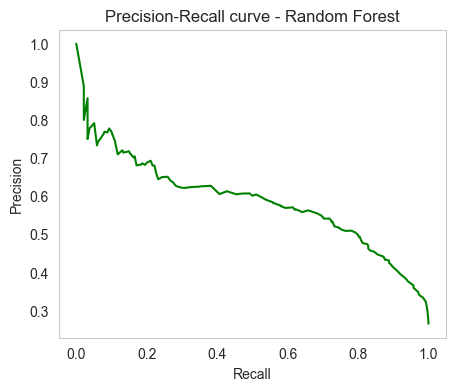

In [104]:
evaluate_model("Random Forest", rf_model_baseline, X_test, y_test)